<a href="https://colab.research.google.com/github/Fer1ado/DataScience/blob/main/Copia_de_Untitled0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Este set de datos "BsAs Real Estate on Sale" ofrece una fuente de información sobre propiedades en venta en el Gran Buenos Aires (G.B.A.), Argentina. Recopilado de la plataforma web Properati, este conjunto de datos proporciona una instantánea del mercado inmobiliario en Zona Norte, Zona Sur y Zona Oeste hasta el año 2020.


---


## Las categorías incluidas en el dataset son:

**start_date:** Día de comienzo de la publicación - *str*

**end_date:** Día de finalización de la publicación - *str*

**created_on:** Día de creación de la publicación - *str*

**lat:** Latitud - *float*

**lon:** Longitud - *float*

**l1:** Codigo de País - *str*

**l2:** Codigo de Provincia - *str*

**l3:** Codigo de Localidad - *str*

**rooms:** Cantidad de Ambientes - *int*

**bedrooms:** Cantidad de habitaciones - *int*

**bathrooms:** Cantidad de Baños - *int*

**surface_total:** Superficie Total de la Parcela m2 - *int*

**surface_covered:**	Superficie Cubierta de la Edificacion en m2 - *int*

**price:** Precio - *int*

**currency:** Tipo de moneda - *str*

**title	description:** Titulo de la publicación - *str*

**property_type:** Tipo de Propiedad categorización de 11 entradas - *str*

**operation_type:** Tipo de Operación Venta/Alquiler - *str*



---



## Este conjunto de datos es fundamental para desarrollar modelos predictivos para la valoración de bienes raíces.

**###Las preguntas de investigación planteadas son:**

¿Cómo varían los precios de las propiedades en Zona Norte, Zona Sur y Zona Oeste?

¿Cuál es la relación entre las características de la propiedad (ej., superficie, número de habitaciones) y los precios de venta?

¿Podemos identificar características específicas de las propiedades que incrementan significativamente su valor?

¿Existen subregiones geográficas dentro del G.B.A. que exhiben patrones de precios distintos?

¿Pueden los modelos de aprendizaje automático predecir con precisión los precios de las propiedades basándose en las características disponibles?

**###Para abordar estas preguntas, se proponen las siguientes hipótesis:**

H1: Los precios de las propiedades en Zona Norte son significativamente más altos que en Zona Sur y Zona Oeste debido a la mayor demanda y la percepción de exclusividad.

H2: La superficie y el número de habitaciones tienen una fuerte correlación positiva con los precios de venta.

H5: Los modelos de aprendizaje automático, en particular los algoritmos de regresión, pueden predecir los precios de las propiedades con una precisión razonable, aprovechando las características clave de las mismas.

Estas preguntas e hipótesis nos ayudarán a comprender a profundidad las dinámicas del mercado inmobiliario en el Gran Buenos Aires y a desarrollar un modelo para predecir los precios de los inmuebles en el área.

In [ ]:
from google.colab import drive
import os
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive'

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [ ]:
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import pyplot as plt
from matplotlib import dates as mpl_dates
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

# Standard
from bokeh.io import output_notebook, show, reset_output
# Other
import bokeh
from bokeh.plotting import figure


In [ ]:
df=pd.read_csv("/content/gdrive/MyDrive/Colab_Notebooks/bsas_realstate_on_sale_properati_dataset_2020.csv")
df.head(100)


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
0,2019-10-17,2019-12-23,2019-10-17,-34.605880,-58.384949,Argentina,Capital Federal,San Cristobal,7.0,7.0,2.0,140.0,140.0,153000.0,USD,"***Venta semipiso centro, ideal hostel*****",DESCRIPCION DE LA PROPIEDAD: Departamento de 1...,Departamento,Venta
1,2019-10-17,2019-11-21,2019-10-17,-34.624056,-58.412110,Argentina,Capital Federal,Boedo,2.0,1.0,2.0,70.0,58.0,159000.0,USD,Espectacular PH reciclado en Boedo sin expensas.,PH reciclado en Boedo a una cuadra de la plaz...,PH,Venta
2,2019-10-17,2019-11-01,2019-10-17,-34.593569,-58.427474,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,45.0,45.0,125000.0,USD,Depto.tipo casa de 2 ambientes en Venta en Pal...,"2 ambienets amplio , excelente estado , patio ...",PH,Venta
3,2019-10-17,2019-12-23,2019-10-17,-34.581294,-58.436754,Argentina,Capital Federal,Palermo,2.0,1.0,1.0,85.0,50.0,295000.0,USD,COSTA RICA 5800 / PALERMO HOLLYWOOD / VENTA PH...,HERMOSO PH EN PALERMO!!!2 AMBIENTES TOTALMENTE...,PH,Venta
4,2019-10-17,2020-03-11,2019-10-17,-34.914194,-57.938219,Argentina,Bs.As. G.B.A. Zona Sur,La Plata,2.0,1.0,1.0,50.0,35.0,40000.0,USD,58 entre 1 y 2 Venta de departamento en ph.1 ...,58 entre 1 y 2 Venta de departamento en PH. P...,PH,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2019-10-17,2019-10-22,2019-10-17,-34.574388,-58.448728,Argentina,Capital Federal,Colegiales,2.0,1.0,1.0,43.0,37.0,151500.0,USD,Precioso departamento a Estrenar con Cochera,"Original Fresco y Moderno Edificio , Ubicado c...",Departamento,Venta
96,2019-10-17,2019-12-23,2019-10-17,-34.696098,-58.511293,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,2.0,1.0,1.0,43.0,40.0,95000.0,USD,2 AMB c/COCH *EXCELENTE ESTADO*,Se vende ESPECTACULAR DEPARTAMENTO en la local...,Departamento,Venta
97,2019-10-17,2020-02-21,2019-10-17,-34.646309,-58.558811,Argentina,Bs.As. G.B.A. Zona Oeste,La Matanza,1.0,1.0,1.0,25.0,25.0,70000.0,USD,VENTA 2 AMBIENTES RAMOS MEJIA,"DEPARTAMENTO 2 AMBIENTES CONTRA FRENTE, 2 PISO...",Departamento,Venta
98,2019-10-17,2019-12-23,2019-10-17,-34.468323,-58.514608,Argentina,Bs.As. G.B.A. Zona Norte,San Isidro,2.0,1.0,1.0,48.0,48.0,165000.0,USD,DEPARTAMENTO EN VENTA CON COCHERA Y BAULERA,LUMINOSO 2 AMBIENTES EN EXCELENTES CONDICIONES...,Departamento,Venta


<Axes: >

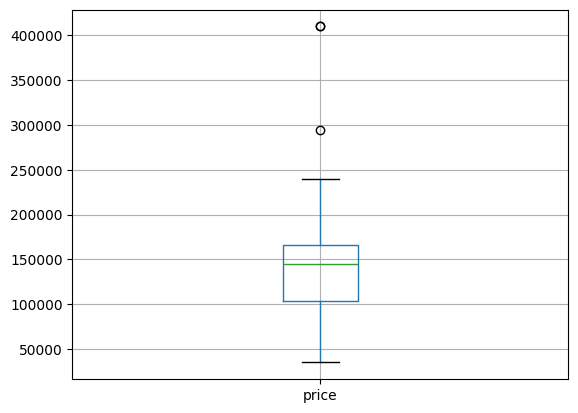

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
_df_5.boxplot(column="price", by=None, ax=None, grid=True)


In [ ]:
#Encontrando los limites
upper_limit = df["price"].mean() + 3*df["price"].std()
lower_limit = df["price"].mean() - 3*df["price"].std()
mean = df["price"].mean()

print("mean", mean)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

df.loc[(df["price"] > upper_limit) | (df["price"] < lower_limit)]

mean 241221.08019909996
upper limit 1196779.464308822
lower limit -714337.3039106221


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
231,2019-10-17,2019-12-23,2019-10-17,-34.611004,-58.361275,Argentina,Capital Federal,Puerto Madero,3.0,2.0,4.0,149.0,149.0,1690000.0,USD,"Venta Alvear Tower 2 suites, 2 cocheras !!",ALVEAR TOWER.Espectacular departamento en el e...,Departamento,Venta
255,2019-10-17,9999-12-31,2019-10-17,-34.598231,-58.569898,Argentina,Bs.As. G.B.A. Zona Oeste,Tres de Febrero,4.0,3.0,3.0,341.0,212.0,11111111.0,USD,VENTA CASA EN CASEROS,Venta casa en Caseros desarrollada en 2 planta...,Casa,Venta
274,2019-10-17,2019-11-12,2019-10-17,-34.572445,-58.420624,Argentina,Capital Federal,Palermo,6.0,3.0,2.0,304.0,304.0,1480000.0,USD,VENTA PALERMO,"Superficie: 304,30m2Características:FrenteMuy ...",Departamento,Venta
280,2019-10-17,2019-11-19,2019-10-17,-34.576297,-58.419997,Argentina,Capital Federal,Palermo,6.0,3.0,3.0,276.0,276.0,1680000.0,USD,Piso ALTO en DUPLEX U$1.680.000 vista a Monu...,Piso de gran categoríaRegia vista a parquesRec...,Departamento,Venta
310,2019-10-17,2019-12-23,2019-10-17,-34.611004,-58.361275,Argentina,Capital Federal,Puerto Madero,4.0,3.0,5.0,250.0,250.0,3390000.0,USD,Venta espectacular 4 ambientes en torre Alvear...,ALVEAR TOWER.Espectacular departamento en el e...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146532,2019-07-31,2019-08-14,2019-07-31,-34.582031,-58.432020,Argentina,Capital Federal,Palermo,6.0,4.0,6.0,326.0,326.0,2740000.0,USD,Torre Mirabilia Piso de 326 m2 - 4 Suites - 4 ...,"Piso Completo en las Alturas. Torre Mirabilia,...",Departamento,Venta
146558,2019-07-31,2020-01-17,2019-07-31,NaN,NaN,Argentina,Capital Federal,Palermo,4.0,3.0,5.0,220.0,210.0,1470000.0,USD,TORRE DECO SEGUI ESPECTACULAR UNIDAD DE 4 AMB ...,EXCLUSIVO Torre Deco Seguí Oportunidad de Inve...,Departamento,Venta
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta
146607,2019-07-31,2019-08-14,2019-07-31,-34.453846,-58.750312,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,USD,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa,Venta


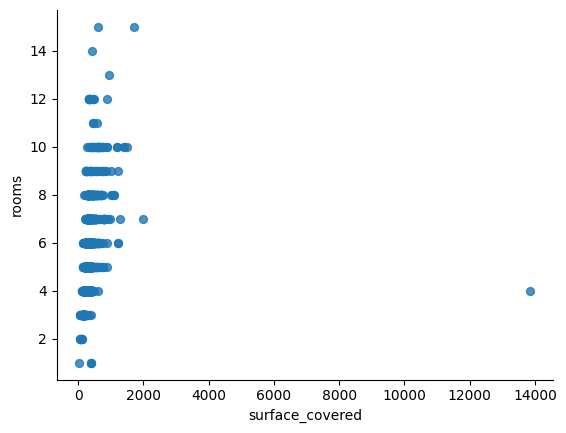

In [ ]:
from matplotlib import pyplot as plt
_df_28.plot(kind='scatter', x='surface_covered', y='rooms', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

antes de remover outliers 146660
despues de remover outliers 140756
outliers 5904


<Axes: >

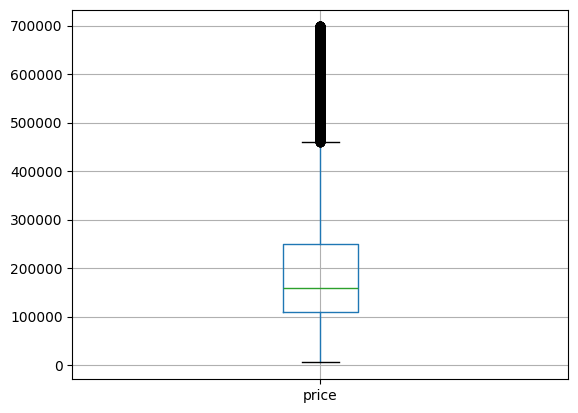

In [ ]:
new_df = df.loc[(df['price'] < upper_limit) & (df['price'] > lower_limit)]
print('antes de remover outliers', len(df))
print('despues de remover outliers', len(new_df))
print('outliers', len(df) - len(new_df))

new_df.boxplot(column="price", by=None, ax=None, grid=True)



In [ ]:
## 2da ronda de outliers Encontrando Nuevo limite

upper_limit = new_df["price"].mean() + 3*new_df["price"].std()
lower_limit = new_df["price"].mean() - 3*new_df["price"].std()
mean = new_df["price"].mean()

print("mean", mean)
print("upper limit", upper_limit)
print("lower limit", lower_limit)

df.loc[(df["price"] > upper_limit) | (df["price"] < lower_limit)]

mean 196795.77530620364
upper limit 565399.9222853987
lower limit -171808.37167299143


,start_date,end_date,created_on,lat,lon,l1,l2,l3,rooms,bedrooms,bathrooms,surface_total,surface_covered,price,currency,title,description,property_type,operation_type
152,2019-10-17,2019-12-23,2019-10-17,-34.393765,-58.644893,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,3.0,2.0,2.0,163.0,118.0,650000.0,USD,NORDELTA | ACQUA RIO - Excelente Departamento ...,Espectacular departamento de 3 ambientes con v...,Departamento,Venta
171,2019-10-17,2019-11-19,2019-10-17,-34.573381,-58.421691,Argentina,Capital Federal,Palermo,3.0,2.0,2.0,99.0,99.0,690000.0,USD,VENTA en TORRES DECO PALERMO 99 m2 con cochera...,"TORRES DECÓ PALERMO - Tprre RosedalDistinción,...",Departamento,Venta
190,2019-10-17,2019-11-19,2019-10-17,-34.567333,-58.460669,Argentina,Capital Federal,Belgrano,3.0,2.0,2.0,107.0,107.0,570000.0,USD,VENTA: Excelente depto en edificio de categorí...,"LIVING/COMEDOR, BALCÓN, TOILETTE, 2 SUITES, 2 ...",Departamento,Venta
202,2019-10-17,2019-12-23,2019-10-17,-34.613087,-58.381360,Argentina,Capital Federal,Monserrat,3.0,2.0,2.0,197.0,197.0,600000.0,USD,Espectacular Propiedad Apto Profesional en Ave...,"Emblematica propiedad en el palacio ""La Inmob...",Departamento,Venta
229,2019-10-17,2019-11-15,2019-10-17,-34.613387,-58.361851,Argentina,Capital Federal,Puerto Madero,3.0,2.0,3.0,172.0,162.0,700000.0,USD,3 ambientes en residencias del Hotel Faena - L...,Departamento duplex de 3 ambientes con cochera...,Departamento,Venta
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146606,2019-07-31,2019-08-13,2019-07-31,-34.452430,-58.745076,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,10.0,5.0,4.0,615.0,615.0,1600000.0,USD,POLLEDO PROPIEDADES Tortugas Country Club,Lindisima casa en dos plantas sobre lote de 16...,Casa,Venta
146607,2019-07-31,2019-08-14,2019-07-31,-34.453846,-58.750312,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,11.0,4.0,4.0,450.0,450.0,1280000.0,USD,Tortugas Country Club,Espectacular casa en dos plantas. Sobre lote d...,Casa,Venta
146608,2019-07-31,2019-08-14,2019-07-31,-34.454703,-58.740616,Argentina,Bs.As. G.B.A. Zona Norte,Pilar,7.0,5.0,4.0,450.0,450.0,1300000.0,USD,POLLEDO PROPIEDADES VENTA CON RENTA. TORTUGAS ...,Lindisima casa a estrenar. Amplios ambientes J...,Casa,Venta
146631,2019-07-31,2019-08-14,2019-07-31,-34.390502,-58.627147,Argentina,Bs.As. G.B.A. Zona Norte,Tigre,5.0,3.0,3.0,240.0,213.0,650000.0,USD,SOL EXC.VISTA VERDE Y RÍO COHERA-AMARRA-SEVICI...,Excelente Dúplex con importantes detalles de d...,Departamento,Venta


antes de remover outliers 140756
despues de remover outliers 137875
outliers -2881


<Axes: >

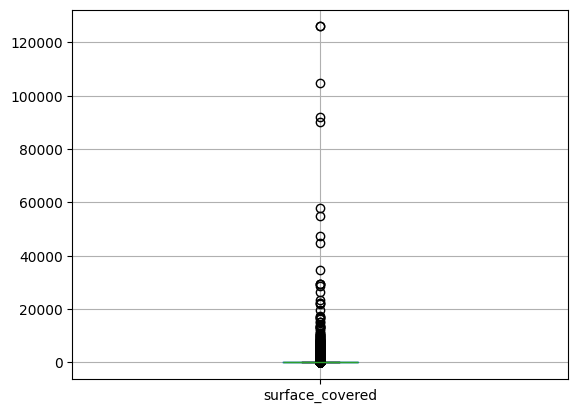

In [ ]:
n2_df = new_df.loc[(df['price'] < upper_limit) & (df['price'] > lower_limit)]
print('antes de remover outliers', len(new_df))
print('despues de remover outliers', len(n2_df))
print('outliers', len(n2_df) - len(new_df))

n2_df.boxplot(column="surface_covered", by=None, ax=None, grid=True)
